In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from itertools import islice

In [4]:
df = pd.read_csv("data_csv/by_country/total.csv")
countries = list(pd.read_csv("data_csv/by_country/total.csv").set_index("Nation").index.unique())
input = iter(countries)
slices = [50,50,50,50,50]
output = [list(islice(input, e)) for e in slices]

In [17]:
def total_confirmed_global():
    global df
    df_time = df.copy()
    df_time["Time"] = pd.to_datetime(df_time["Time"])
    gb = df_time.groupby("Time")
    t = []
    c = []
    d = []
    r = []
    for i, frame in gb:
        t.append(i.strftime("%b-%d"))
        c.append(np.sum(frame["Confirmed Case"]))
        d.append(np.sum(frame["Death"]))
        r.append(np.sum(frame["Recover"]))
    df_total = pd.DataFrame({"Time":t, "Confirmed Case":c, "Death":d, "Recover":r})
    df_total["Active"] = df_total["Confirmed Case"]-df_total["Death"]-df_total["Recover"]
    fig = plt.figure()
    plt.plot(df_total["Time"], df_total["Confirmed Case"], linewidth=5, c='r')
    plt.plot(df_total["Time"], df_total["Death"], linewidth=5, c='#4A4A4A')
    plt.plot(df_total["Time"], df_total["Recover"], linewidth=5, c='#3ad800')
    plt.plot(df_total["Time"], df_total["Active"], linewidth=5, c='#5d5dff')
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Number of Cases", fontsize=18)
    plt.title("Global Cumulative Cases", fontsize=18)
    plt.tight_layout()
    fig.set_figheight(9)
    fig.set_figwidth(12)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.gca().tick_params(axis="x", labelsize=18)
    plt.gca().tick_params(axis="y", labelsize=18)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks(rotation=45)
    plt.grid(b=1, which="major", axis="both", c='#C0C0C0')
    plt.legend()
    plt.savefig("results/total.png")
    plt.close(fig)
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(12)
    confirmed = df_total.iloc[-1]["Confirmed Case"]
    recover = 100*df_total.iloc[-1]["Recover"]/confirmed
    death = 100*df_total.iloc[-1]["Death"]/confirmed
    active = 100*df_total.iloc[-1]["Active"]/confirmed
    x = ["Recovery\Rate", "Mortality\nRate", "Active"]
    y = [recover, death, active]
    bars = plt.barh(x, y)
    bars[0].set_color("#5dff5d")
    bars[1].set_color("#aaaaaa")
    bars[2].set_color("#5d5dff")
    plt.gca().tick_params(axis="y", labelsize=18)
    plt.xlim(0,100)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
    for i, v in enumerate(y):
        plt.text(v+2, i, str(round(v, 2))+"%", fontsize=18)
    plt.tight_layout()
    plt.savefig("results/distribution.png")
    
#     return df_total.iloc[-1]["Confirmed Case"]

In [18]:
def cases_plot(df):
    fig = plt.figure()
    df["Active"] = df["Confirmed Case"]-df["Death"]-df["Recover"]
    plt.plot(pd.to_datetime(df["Time"]).dt.strftime("%b-%d"),df["Confirmed Case"], linewidth=5, c='r')
    plt.plot(pd.to_datetime(df["Time"]).dt.strftime("%b-%d"),df["Death"], linewidth=5, c='#4A4A4A')
    plt.plot(pd.to_datetime(df["Time"]).dt.strftime("%b-%d"),df["Recover"], linewidth=5, c='#3ad800')
    plt.plot(pd.to_datetime(df["Time"]).dt.strftime("%b-%d"),df["Active"], linewidth=5, c='#5d5dff')
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Number of Cases", fontsize=18)
    plt.title("{} Coronavirus Count".format(country), fontsize=18)
    plt.tight_layout()
    fig.set_figheight(9)
    fig.set_figwidth(12)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.gca().tick_params(axis="x", labelsize=18)
    plt.gca().tick_params(axis="y", labelsize=18)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks(rotation=45)
    plt.grid(b=1, which="major", axis="both", c='#C0C0C0')
    plt.legend()
    plt.savefig("results/confirmed_cases_country/confirmed_cases_{}.png".format(country))
    plt.close(fig)

In [5]:
def get_daily():
    global df
    df_a = df.copy()
    timeline = []
    time_init = pd.to_datetime("04/03/2020 09:00:01")
    df_a["Time"] = pd.to_datetime(df_a["Time"])
    time_end = df_a.sort_values("Time").iloc[-1]["Time"]
    
    while time_init<time_end:
        timeline.append(time_init)
        time_init+=pd.Timedelta("1 days")
        
    return timeline

In [6]:
def daily_plot(df):
    df = df.set_index("Nation")
    df["Time"] = pd.to_datetime(df["Time"])
    timeline = get_daily()
    date = []
    confirmed, death, recover = [], [], []
    for i in range(len(timeline)-1):
        df_daily = df.copy()
        t1 = timeline[i]
        t2 = timeline[i+1]
        df_daily = df_daily[df_daily["Time"]>t1]
        df_daily = df_daily[df_daily["Time"]<t2]
        df_daily = df_daily[df_daily["Time"]==np.max(df_daily["Time"])]
        if df_daily.empty:
            confirmed.append(0)
            death.append(0)
            recover.append(0)
            date.append(t1)
        else:
            confirmed.append(df_daily["Confirmed Case"][0])
            death.append(df_daily["Death"][0])
            recover.append(df_daily["Recover"][0])
            date.append(df_daily["Time"][0])
    
    confirmed = [confirmed[i+1]-confirmed[i] for i in range(len(confirmed)-1)]
    death = [death[i+1]-death[i] for i in range(len(death)-1)]
    recover = [recover[i+1]-recover[i] for i in range(len(recover)-1)]
    date.remove(date[0])
    df_daily = pd.DataFrame({"Date":date, "Confirmed Case":confirmed, "Death":death, "Recover":recover})
    df_daily["Date"] = pd.Series([(t.round(freq="D")) for t in df_daily["Date"]])
    fig = plt.figure()
    length = int(len(df_daily)/7)
    for i in range(length):
        fig = plt.figure()
        x = date2num(list(df_daily['Date'].iloc[7*(i):7*(i+1)]))
        plt.bar(x, list(df_daily["Confirmed Case"].iloc[7*(i):7*(i+1)]), color='red', align="center", width=0.3, label="Confirmed")
        plt.bar(x+0.3, list(df_daily["Death"].iloc[7*(i):7*(i+1)]), color='#4A4A4A', align="center", width=0.3, label = "Death")
        plt.bar(x-0.3, list(df_daily["Recover"].iloc[7*(i):7*(i+1)]), color='#3ad800', align="center", width=0.3, label = "Recover")
        plt.gca().xaxis_date()
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B-%d'))
        fig.set_figheight(9)
        fig.set_figwidth(12)
        plt.xlabel("Date", fontsize=18)
        plt.ylabel("Number of cases", fontsize=18)
        plt.title("Weekly Cases in {}".format(country), fontsize=18)
        plt.gca().tick_params(axis="x", labelsize=18)
        plt.gca().tick_params(axis="y", labelsize=18)
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.grid(b=1, which="major", axis="y", c='#C0C0C0')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.savefig("results/daily_cases_country/daily_cases_{}_week{}.png".format(country, i+1))
        plt.close(fig)
#     return df_daily

In [5]:
def top10_confirmed():
    global df
    df_top = df.copy()
    df_top["Time"] = pd.to_datetime(df_top["Time"])
    df_top = df_top[df_top["Time"]==np.max(df_top["Time"])]
    df_top = df_top.sort_values("Confirmed Case", ascending=False)
    fig = plt.figure()
    fig.set_figheight(9)
    fig.set_figwidth(12)
    plt.barh(df_top.head(10)["Nation"], df_top.head(10)["Confirmed Case"], color="#724ddf")
    plt.gca().tick_params(axis="x", labelsize=18)
    plt.gca().tick_params(axis="y", labelsize=18)
    plt.xticks(rotation=30)
    plt.gca().invert_yaxis()
    plt.xlabel("Number of cases", fontsize=18)
    plt.ylabel("Country", fontsize=18)
    plt.title("Global Top 10", fontsize=18)
    plt.grid(b=1, which="major", axis="x", c='#C0C0C0')
    for i, v in enumerate(df_top.head(10)["Confirmed Case"]):
        plt.text(v + 3, i + .25, str(v), color='#724ddf', fontweight='bold', fontsize=12)
    xmax = df_top.head(10)["Confirmed Case"].iloc[0] + 250000
    plt.gca().set_xlim([0,xmax])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()
    plt.savefig("results/top10_global_confirmed.png")
#     return df_top.head(10)["Confirmed Case"].iloc[0]

In [74]:
def rates(df):
    df_l = df.copy()
    df_l["Time"] = pd.to_datetime(df_l["Time"])
    df_l = df_l[df_l["Time"]==np.max(df_l["Time"])]
    labels = ["Active", "Deaths", "Recovered"]
    df_l["Active"] = df_l["Confirmed Case"] - df_l["Death"] - df_l["Recover"]
    active = 100 * df_l["Active"].values[0]/df_l["Confirmed Case"].values[0]
    death = 100 * df_l["Death"].values[0]/df_l["Confirmed Case"].values[0]
    recover = 100 * df_l["Recover"].values[0]/df_l["Confirmed Case"].values[0]
    x = ["Recovery\nRate", "Mortality\nRate", "Active"]
    y = [recover, death, active]
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(12)
    if df_l["Confirmed Case"].values[0]!=0:
        bars = plt.barh(x, y)
        bars[0].set_color("#5dff5d")
        bars[1].set_color("#aaaaaa")
        bars[2].set_color("#5d5dff")
    else:
        bar = plt.barh(["No Data Available/\nNo Recorded Case"], [0.0])
    plt.gca().tick_params(axis="y", labelsize=18)
    plt.xlim(0,100)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
    for i, v in enumerate(y):
        plt.text(v+2, i, str(round(v, 2))+"%", fontsize=18)
    plt.tight_layout()
    plt.savefig("results/percent/{}.png".format(country))
    plt.close(fig)
#     return x,y

In [32]:
for country in output[0]:
# for country in output[1]:
# for country in output[2]:
# for country in output[3]:
# for country in output[4]:
    df_x = pd.read_csv("data_csv/by_country/{}.csv".format(country))
    print(country)
    cases_plot(df_x)
#     daily_plot(df_x)
#     rates(df_x)

AFGHANISTAN
ALBANIA
ALGERIA
ANDORRA
ANGOLA
ANGUILLA
ANTIGUA AND BARBUDA
ARGENTINA
ARMENIA
ARUBA
AUSTRALIA
AUSTRIA
AZERBAIJAN
BAHAMAS
BAHRAIN
BANGLADESH
BARBADOS
BELARUS
BELGIUM
BELIZE
BENIN
BERMUDA
BHUTAN
BOLIVIA
BOSNIA-HERZEGOVINA
BOTSWANA
BRAZIL
BRITISH VIRGIN ISLANDS
BRUNEI
BULGARIA
BURKINA FASO
BURUNDI
CABO VERDE
CAMBODIA
CAMEROON
CANADA
CAYMAN ISLAND
CENTRAL AFRICAN REPUBLIC
CHAD
CHANNEL ISLANDS
CHILE
CHINA, Mainland
COLOMBIA
COMOROS
CONGO
COSTA RICA
COTE D'IVOIRE
CROATIA
CUBA
CURACAO


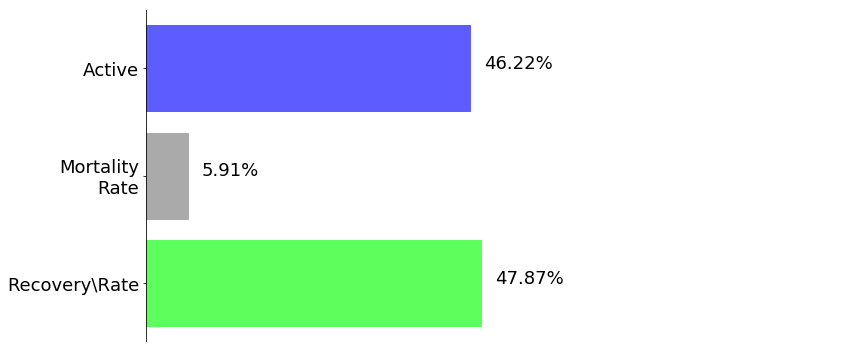

In [18]:
total_confirmed_global()
# top10_confirmed()